In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
df_count = pd.read_csv("results/hochuli/mnist_count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.036614,0.946312,0.661167,17.323018,144,1056384000
1,1,2,0.754310,0.640754,0.761889,17.237348,9606,1056384000
2,1,3,0.633841,0.584555,0.783111,17.289251,8468,1056384000
3,1,4,0.556454,0.509296,0.811111,17.661579,9666,1056384000
4,1,5,0.508577,0.490273,0.815944,17.236981,8720,1056384000
...,...,...,...,...,...,...,...,...
250,5,47,0.163533,0.291770,0.901778,17.233976,641,1056384000
251,5,48,0.164633,0.282048,0.902444,17.186732,8660,1056384000
252,5,49,0.159508,0.299809,0.900500,17.198821,996,1056384000
253,5,50,0.156183,0.312579,0.899056,17.189011,17096,1056384000


In [76]:
df_original = pd.read_csv("results/hochuli/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.036761,0.952535,0.652944,12.285011,0,0
1,1,2,0.771401,0.648002,0.762667,12.240320,0,0
2,1,3,0.641368,0.582087,0.784833,12.358368,0,0
3,1,4,0.554885,0.498287,0.817778,12.242292,0,0
4,1,5,0.502396,0.486479,0.819889,12.239204,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.157227,0.287606,0.903389,12.226458,0,0
251,5,48,0.155813,0.288060,0.902611,12.237892,0,0
252,5,49,0.153546,0.286107,0.905333,12.269241,0,0
253,5,50,0.147957,0.279959,0.909667,12.213713,0,0


In [77]:
df_diff = pd.read_csv("results/hochuli/mnist_diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.294431,2.261628,0.350944,12.204367,0,0
1,1,2,1.112990,0.689601,0.743500,12.271979,0,0
2,1,3,0.669461,0.610880,0.780278,12.161336,0,0
3,1,4,0.567527,0.510017,0.813444,12.183752,0,0
4,1,5,0.508652,0.485296,0.820556,12.178635,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.155122,0.301045,0.901167,12.247120,0,0
251,5,48,0.152090,0.295965,0.899944,12.242940,0,0
252,5,49,0.148698,0.300837,0.899000,12.245870,0,0
253,5,50,0.148050,0.291517,0.905056,12.241371,0,0


In [78]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [79]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_2683/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_2683/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_2683/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

Tamanho da rede: 122_570

In [80]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 9.01004937598449e-06    1/110_987


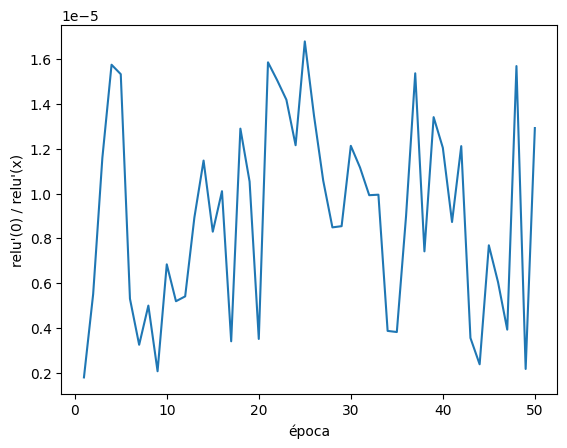

In [81]:
df_train_avg = df_count_train.groupby("epoch").mean()
ax = sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")
ax.set(xlabel="época", ylabel="relu'(0) / relu'(x)")
plt.savefig('relu_proportion.eps', format='eps')

## Eficiência do Modelo

In [82]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 90.06%


<Axes: xlabel='epoch', ylabel='train_loss'>

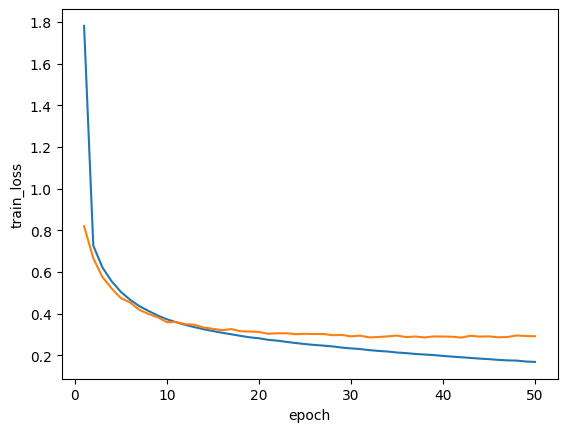

In [83]:
ax = sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss", ax=ax)

In [84]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 14:22


## Comparando com funções diferenciáveis

In [85]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()

[Text(0.5, 0, 'época'), Text(0, 0.5, 'tempo (seg)')]

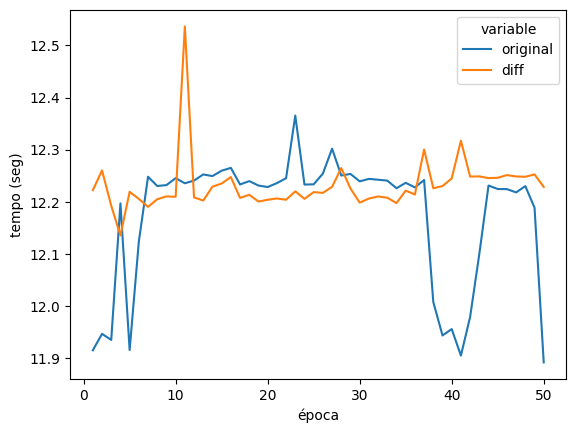

In [86]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
#ax.set_title("Tempo por Epoca")
ax.set(xlabel="época", ylabel="tempo (seg)")

In [87]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 10:09
Tempo total de treino (diff): 10:12
Diferença: 0.49%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

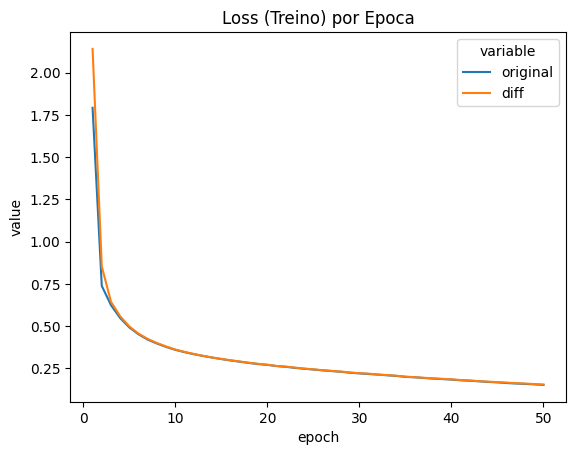

In [88]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

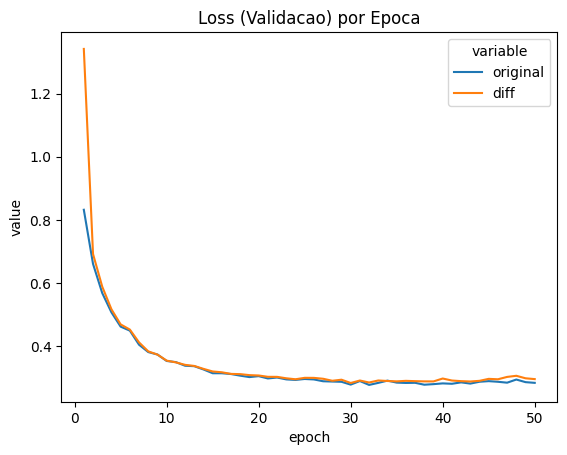

In [89]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

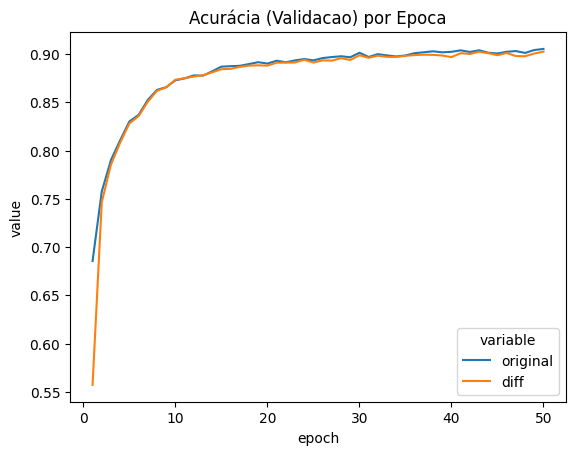

In [90]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [91]:
# melhor época original
best_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]
best_original

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
32,3.0,0.21338,0.276928,0.899878,12.242185,0.0,0.0,NaN


In [92]:
# melhor época diff
best_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]
best_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
30,3.0,0.222012,0.28305,0.8987,12.198193,0.0,0.0,NaN


In [93]:
column_original = np.array([best_original.index[0]] + list(best_original.values[0]))[:6]
column_diff = np.array([best_diff.index[0]] + list(best_diff.values[0]))[:6]
column_difference = 100 * (column_diff - column_original) / column_original
indexes = ["epoch"] + list(best_original)[:5]
pd.DataFrame({"Não Diferenciáveis": column_original, "Diferenciáveis": column_diff, "Diferença (%)": column_difference}, index=indexes)

,Não Diferenciáveis,Diferenciáveis,Diferença (%)
epoch,32.000000,30.000000,-6.250000
execution,3.000000,3.000000,0.000000
train_loss,0.213380,0.222012,4.045516
val_loss,0.276928,0.283050,2.210729
val_acc,0.899878,0.898700,-0.130882
time,12.242185,12.198193,-0.359351


In [94]:
list(best_original)

['execution',
 'train_loss',
 'val_loss',
 'val_acc',
 'time',
 'zero_relu_call',
 'total_relu_call',
 'relu_proportion']

In [95]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 06:31
Tempo de treino até melhor época (diff): 06:07
Diferença: -6.14%


## Avaliação nos dados de teste

In [96]:
df_diff_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.297968,0.8980,1.269205,0,0
101,2,-1,NaN,0.294643,0.8970,1.260402,0,0
152,3,-1,NaN,0.300511,0.8954,1.264198,0,0
203,4,-1,NaN,0.292725,0.9019,1.263530,0,0
254,5,-1,NaN,0.277338,0.9060,1.265903,0,0


In [97]:
df_original_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.288983,0.9004,1.262363,0,0
101,2,-1,NaN,0.292437,0.8982,1.264677,0,0
152,3,-1,NaN,0.292809,0.9007,1.266744,0,0
203,4,-1,NaN,0.288795,0.8998,1.278348,0,0
254,5,-1,NaN,0.282695,0.9021,1.270087,0,0


In [98]:
# prediction time
diff_time = df_diff_test["time"].mean()
original_time = df_original_test["time"].mean()
diff = (diff_time - original_time) / original_time
print(f"Tempo Diferenciáveis: {diff_time} seg")
print(f"Tempo Não-diferenciáveis: {original_time} seg")
print(f"Diferenciáveis são {round(100*diff, 2)}% mais lentas")

Tempo Diferenciáveis: 1.2646475791931153 seg
Tempo Não-diferenciáveis: 1.268443727493286 seg
Diferenciáveis são -0.3% mais lentas


In [99]:
# loss
diff_loss = df_diff_test["val_loss"].mean()
original_loss = df_original_test["val_loss"].mean()
diff = (diff_loss - original_loss) / original_loss
print(f"Loss Diferenciáveis: {diff_loss}")
print(f"Loss Não-diferenciáveis: {original_loss}")
print(f"Diferenciáveis são {round(100*diff, 2)}% piores")

Loss Diferenciáveis: 0.29263719528913495
Loss Não-diferenciáveis: 0.28914393365383145
Diferenciáveis são 1.21% piores


In [100]:
# acc
diff_acc = df_diff_test["val_acc"].mean()
original_acc = df_original_test["val_acc"].mean()
diff = (diff_acc - original_acc) / original_acc
print(f"Acurácia Diferenciáveis: {diff_acc} seg")
print(f"Acurácia Não-diferenciáveis: {original_acc} seg")
if diff < 0:
    print(f"Acurácia das diferenciáveis é {-round(100*diff, 2)}% menor")
else:
    print(f"Acurácia das diferenciáveis é {round(100*diff, 2)}% maior")

Acurácia Diferenciáveis: 0.8996599999999999 seg
Acurácia Não-diferenciáveis: 0.9002399999999999 seg
Acurácia das diferenciáveis é 0.06% menor
